In [3]:
!pip install statsmodels


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [15]:
df= pd.read_csv("daily-min-temperatures.csv",index_col=0,parse_dates=True)
x=df.values
print('shape of data \t',df.shape)
print('orignal dataset:\n',df.head())
print('after extracting only temperature : \n',x)

shape of data 	 (3650, 1)
orignal dataset:
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
after extracting only temperature : 
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


check for Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'],autolag='AIC')

print("1. ADF :", dftest[0])
print("2. P-Value :",dftest[1])
print("3. num of lags :",dftest[2])
print("4. num of observations used for ADF regression and critical values calculation :",dftest[3])
print("5. critical values :")
for key,val in dftest[4].items():
    print("\t",key ,":",val)

1. ADF : -4.444804924611706
2. P-Value : 0.0002470826300360931
3. num of lags : 20
4. num of observations used for ADF regression and critical values calculation : 3629
5. critical values :
	 1% : -3.4321532327220154
	 5% : -2.862336767636517
	 10% : -2.56719413172842


<Axes: xlabel='Date'>

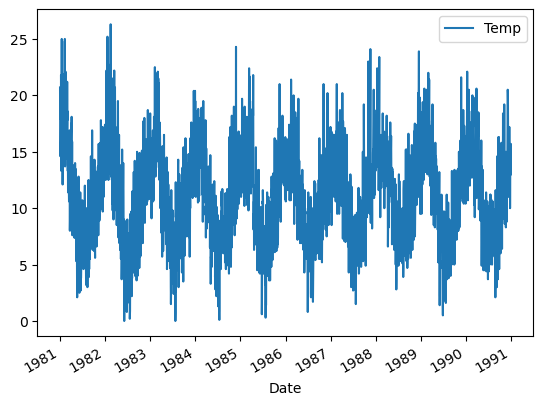

In [29]:
df.plot()

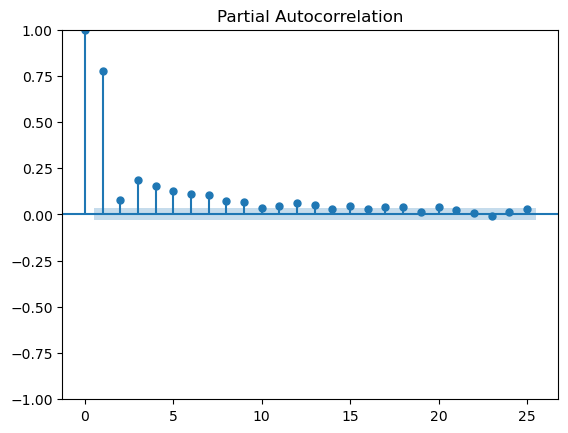

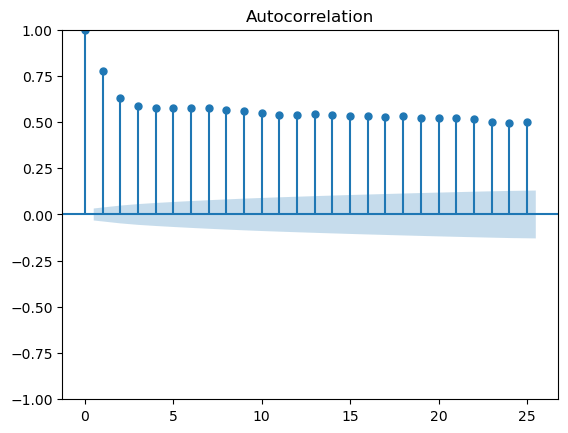

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['Temp'],lags=25)
acf=plot_acf(df['Temp'],lags=25)

Split Dataset intro Train and Test Testing : Last 7 days

In [32]:
train=x[:len(x)-7]
test=x[len(x)-7:]

In [36]:
model=AutoReg(train,lags=10).fit()

In [38]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Wed, 11 Sep 2024   AIC                          16775.028
Time:                        23:19:36   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

make predictions on test set and compare

In [41]:
pred = model.predict(start=len(train),end=len(x)-1,dynamic= False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


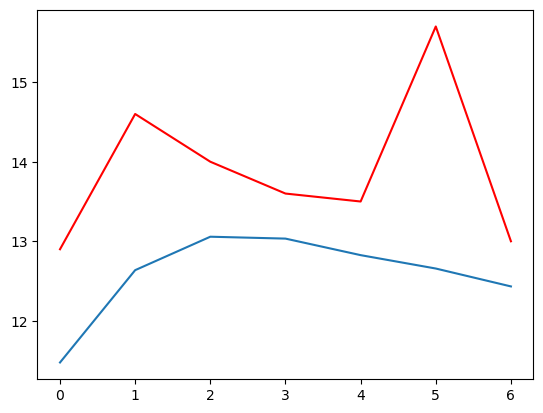

In [43]:
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

Calculate Error

In [46]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))

In [48]:
print(rmse)

1.5638196220860852


making future predictions

In [51]:
pred_future=model.predict(start=len(x)+1,end=len(x)+7,dynamic=False)
print("the future prediction for the next week")
print(pred_future)
print("number of prediaction mode : \t",len(pred_future))

the future prediction for the next week
[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
number of prediaction mode : 	 7
